In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/Data Science/Project-50 Predicting Bike Rentals Count Using ML And H2O Auto ML/day.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.shape

(731, 16)

In [5]:
df.rename(columns={'dteday':'day', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_condition',
                   'hum': 'humidity', 'cnt': 'total_count'}, inplace=True)

In [6]:
df.head()

,instant,day,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# checking nunque values
df.nunique()

instant              731
day                  731
season                 4
year                   2
month                 12
holiday                2
weekday                7
workingday             2
weather_condition      3
temp                 499
atemp                690
humidity             595
windspeed            650
casual               606
registered           679
total_count          696
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   day                731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

## Data visualization

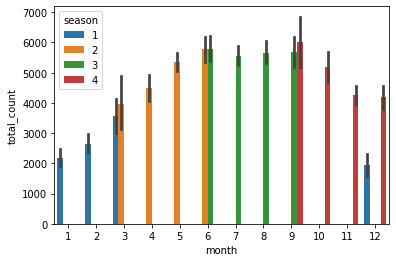

In [11]:
sns.barplot(data=df, x='month', y='total_count', hue='season')
plt.show()

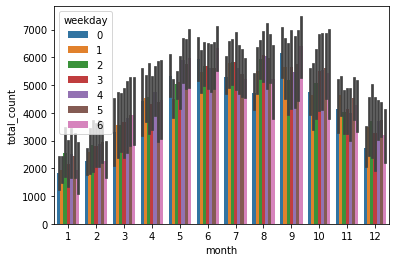

In [12]:
sns.barplot(data=df, x='month', y='total_count', hue='weekday')
plt.show()

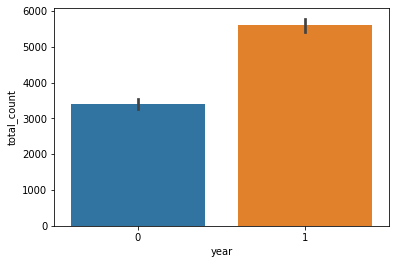

In [13]:
sns.barplot(data=df, x='year', y='total_count')
plt.show()

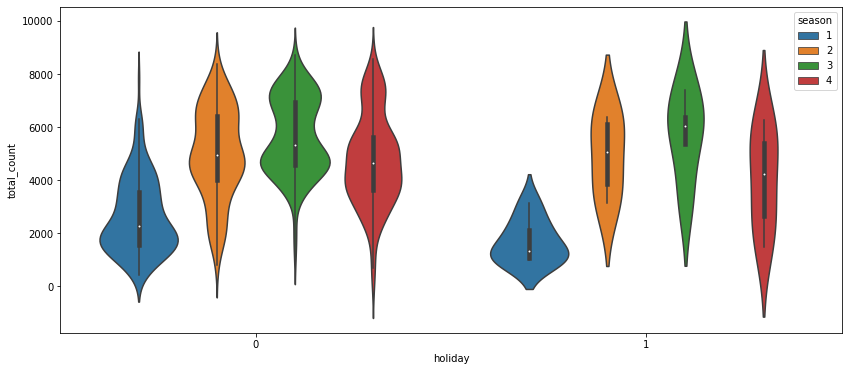

In [15]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='holiday', y='total_count', hue='season')
plt.show()

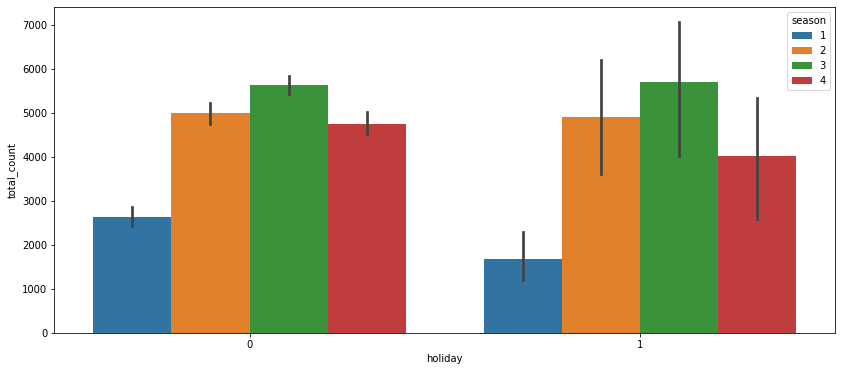

In [16]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='holiday', y='total_count', hue='season')
plt.show()

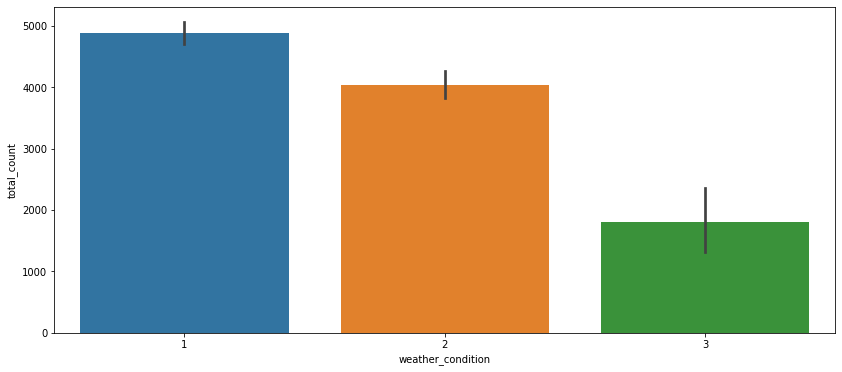

In [19]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='weather_condition', y='total_count')
plt.show()

## outlayers

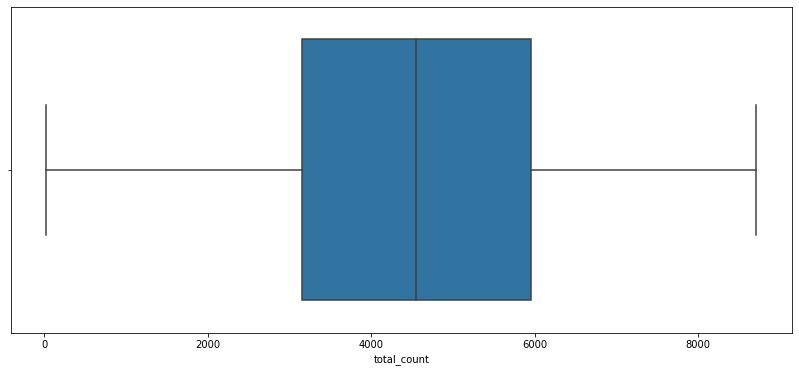

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='total_count')
plt.show()

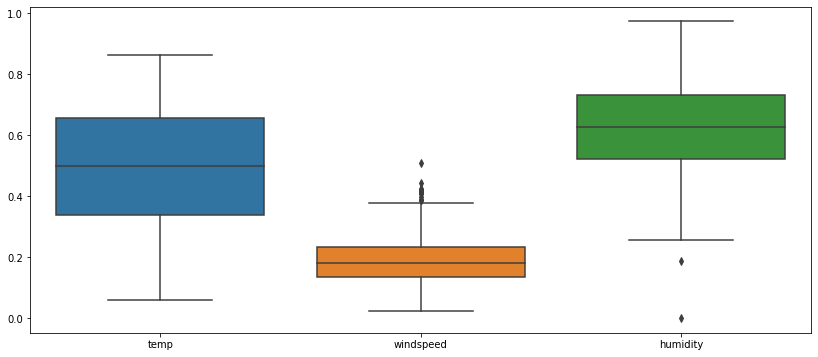

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['temp', 'windspeed', 'humidity']])
plt.show()

## Plotting QQ Plot

In [22]:
import scipy.stats as stat
import pylab

In [30]:
def plot_curve(column):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(column)
  sns.kdeplot(x=df[column], fill=True, color='r')
  plt.subplot(1, 2, 2)
  stat.probplot(df[column], dist='norm', plot=pylab,)
  plt.show()

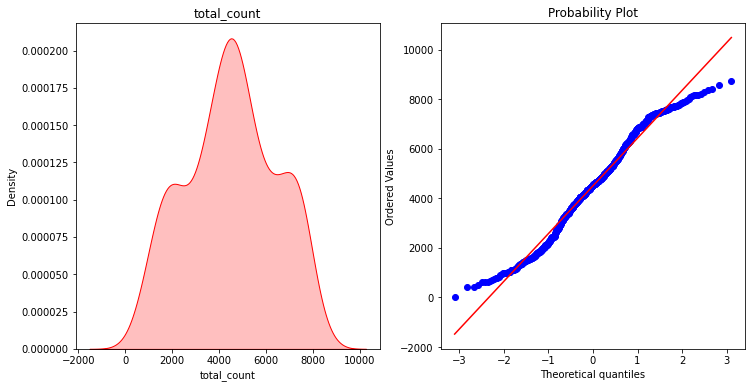

In [31]:
plot_curve('total_count')

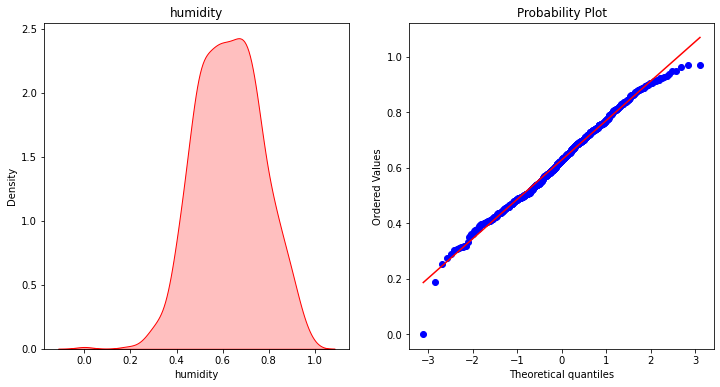

In [32]:
plot_curve('humidity')

## correlation plot

In [35]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)]=False

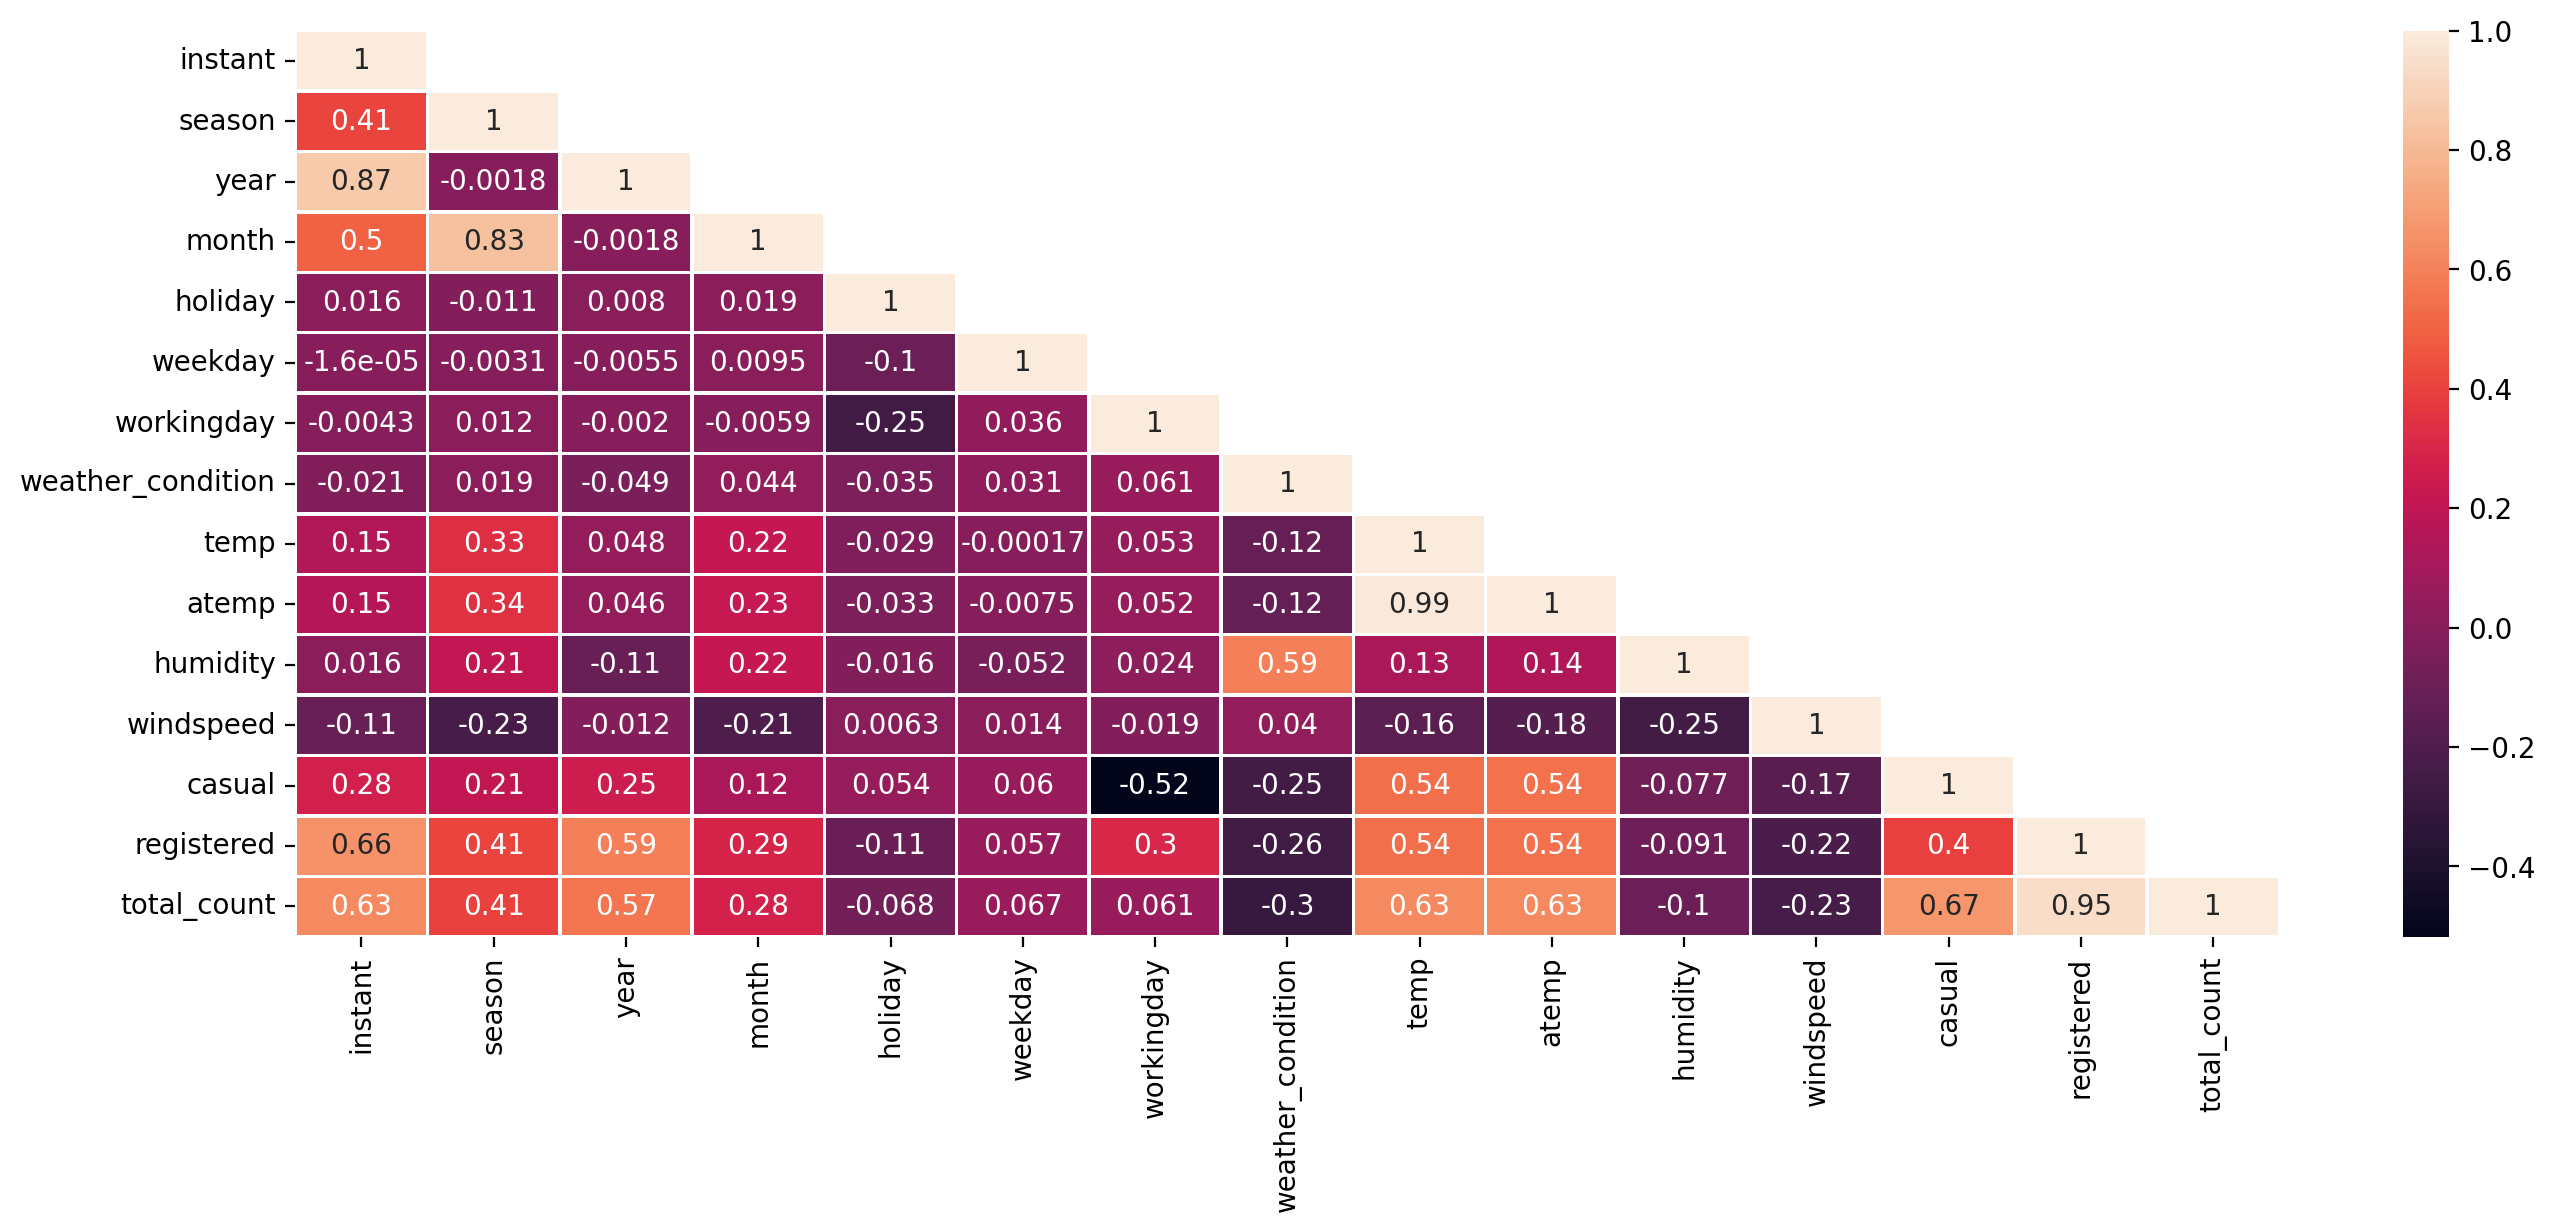

In [37]:
plt.figure(figsize=(16, 6), dpi=200)
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=0.9)
plt.show()

## Data preprocessing

In [38]:
df.head()

,instant,day,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
x = df.drop(['instant', 'day', 'total_count','atemp'], axis=1)
y = df['total_count'].values

In [54]:
x.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518


In [55]:
x.describe()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000


In [56]:
# splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
columns = ['registered', 'casual']

In [58]:
scaler = StandardScaler().fit(x[columns])
x[columns] = scaler.transform(x[columns])

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

## bulding the model

In [73]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

In [63]:
all_models = [LinearRegression, Lasso, RandomForestRegressor, DecisionTreeRegressor, XGBRegressor, ExtraTreesRegressor]

In [64]:
def get_model_score(model):
    model = model()
    model.fit(x_train, y_train)
    
    print(type(model).__name__)
    print("Training Score", model.score(x_train, y_train))
    print("Testing SCore", model.score(x_test, y_test))
    return model

In [65]:
models = {}
for i in all_models:
    model = get_model_score(i)
    models[type(model).__name__] = model
    print('---'*20)

LinearRegression
Training Score 1.0
Testing SCore 1.0
------------------------------------------------------------
Lasso
Training Score 0.9999996140600598
Testing SCore 0.9999995858610274
------------------------------------------------------------
RandomForestRegressor
Training Score 0.9994429661667011
Testing SCore 0.9967340449260704
------------------------------------------------------------
DecisionTreeRegressor
Training Score 1.0
Testing SCore 0.9815696778591788
------------------------------------------------------------
[20:53:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
Training Score 0.9986568848557648
Testing SCore 0.996651432536285
------------------------------------------------------------
ExtraTreesRegressor
Training Score 1.0
Testing SCore 0.9970603446625532
------------------------------------------------------------


In [117]:
model = models['Lasso']

In [118]:
pred = model.predict(x_test)

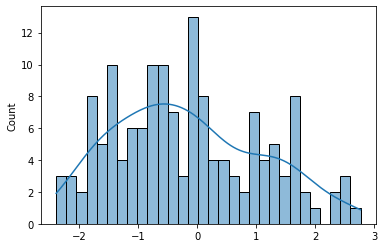

In [119]:
sns.histplot(x=y_test-pred, bins=30, kde=True)
plt.show()

In [120]:
print("R2 Score",metrics.r2_score(y_test, pred))
print("MSE Score",metrics.mean_squared_error(y_test, pred))
print("MAE Score",metrics.mean_absolute_error(y_test, pred))
print("RMSE Score",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score 0.9999995858610274
MSE Score 1.5361544855346116
MAE Score 1.0330035044655146
RMSE Score 1.2394169942092175


## Hyperparameter Tuning

In [123]:
param = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1, 5, 10, 20, 30, 50],
    'tol':[1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-2, 0.1],
    "max_iter":[100, 200, 500, 1000, 5000],
}

In [124]:
gr = GridSearchCV(estimator=Lasso(), param_grid=param,
                scoring='neg_mean_squared_error', cv=5,
                )

In [125]:
gr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e-04, tolerance: 1.681e-06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e-04, tolerance: 1.703e-06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   20, 30, 50],
                         'max_iter': [100, 200, 500, 1000, 5000],
                         'tol': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.01,
                                 0.1]},
             scoring='neg_mean_squared_error')

In [126]:
gr.best_params_

{'alpha': 1e-15, 'max_iter': 200, 'tol': 1e-15}

In [127]:
model = Lasso(alpha= 1e-15,)

In [128]:
model.fit(x_train, y_train)

Lasso(alpha=1e-15)

In [129]:
pred = model.predict(x_test)

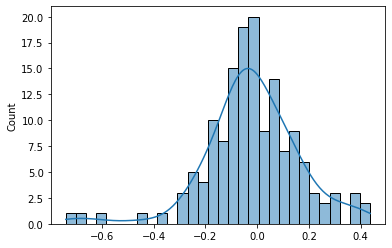

In [130]:
sns.histplot(x=y_test-pred, bins=30, kde=True)
plt.show()

In [131]:
print("R2 Score",metrics.r2_score(y_test, pred))
print("MSE Score",metrics.mean_squared_error(y_test, pred))
print("MAE Score",metrics.mean_absolute_error(y_test, pred))
print("RMSE Score",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score 0.9999999910702231
MSE Score 0.03312298002324245
MAE Score 0.13150415002032756
RMSE Score 0.18199719784447907


## Auto ML

In [ ]:
# ! pip install requests tabulate future

In [ ]:
# ! pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [ ]:
# ! pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user

In [135]:
import h2o

In [136]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyxrj_oi3
  JVM stdout: /tmp/tmpyxrj_oi3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyxrj_oi3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"14 days, 5 hours and 18 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_450smm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [137]:
bike = h2o.import_file(path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [139]:
bike.head(5)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600


In [146]:
x = ['season', 'yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
y = 'cnt'

In [143]:
x_train, x_test = bike.split_frame(ratios=[0.2], seed=44)

In [144]:
aml = h2o.automl.H2OAutoML(max_runtime_secs=3000, max_models=10, seed=10, verbosity='info', nfolds=2)

In [147]:
aml.train(training_frame=x_train, x=x, y=y)

AutoML progress: |
21:24:37.962: Project: AutoML_1_20221110_212437
21:24:37.966: Setting stopping tolerance adaptively based on the training frame: 0.05
21:24:37.967: Build control seed: 10
21:24:37.968: training frame: Frame key: AutoML_1_20221110_212437_training_py_4_sid_98be    cols: 16    rows: 147  chunks: 1    size: 6496  checksum: -6878528676948338965
21:24:37.969: validation frame: NULL
21:24:37.969: leaderboard frame: NULL
21:24:37.969: blending frame: NULL
21:24:37.970: response column: cnt
21:24:37.970: fold column: null
21:24:37.970: weights column: null
21:24:38.23: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 30w), grid_3 (

,mean,sd,cv_1_valid,cv_2_valid
mae,206.67537,23.293612,190.2043,223.14644
mean_residual_deviance,80726.11,1906.6348,82074.3,79377.914
mse,80726.11,1906.6348,82074.3,79377.914
null_deviance,317458496.0000000,20938632.0000000,332264352.0000000,302652640.0000000
r2,0.9804509,0.0010814,0.9812155,0.9796863
residual_deviance,5932694.5,83055.67,5991424.0,5873965.5
rmse,284.1135,3.3554103,286.4861,281.74084
rmsle,0.299638,0.2945256,0.5078991,0.0913770


In [148]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20221110_212437,284.148,80739.9,206.743,0.363891,80739.9
StackedEnsemble_AllModels_1_AutoML_1_20221110_212437,303.278,91977.5,222.092,0.366119,91977.5
GBM_5_AutoML_1_20221110_212437,372.449,138718,270.741,0.372271,138718
XGBoost_2_AutoML_1_20221110_212437,373.897,139799,279.961,0.385209,139799
XGBoost_3_AutoML_1_20221110_212437,379.041,143672,294.479,0.332743,143672
GBM_2_AutoML_1_20221110_212437,398.024,158423,297.854,0.393918,158423
GBM_3_AutoML_1_20221110_212437,415.391,172550,313.281,0.389829,172550
GBM_4_AutoML_1_20221110_212437,416.686,173627,306.551,0.393747,173627
XGBoost_1_AutoML_1_20221110_212437,486.608,236787,370.993,0.403532,236787
XRT_1_AutoML_1_20221110_212437,490.671,240758,366.768,0.421832,240758


In [149]:
aml.leader.model_performance(x_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 58572.353950984776
RMSE: 242.01725961382337
MAE: 186.2112976920802
RMSLE: 0.0987098096580568
Mean Residual Deviance: 58572.353950984776
R^2: 0.9838901837289902
Null degrees of freedom: 583
Residual degrees of freedom: 580
Null deviance: 2130277539.9696884
Residual deviance: 34206254.70737511
AIC: 8078.482770562557

In [151]:
output = h2o.get_model('StackedEnsemble_BestOfFamily_1_AutoML_1_20221110_212437')

In [152]:
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20221110_212437',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20221110_212437'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221110_212437_training_py_4_sid_98be',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221110_212437_training_py_4_sid_98be'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221110_212437_training_py_4_sid_98be',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221110_212437_training_py_4_sid_98be'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [153]:
pred = aml.leader.predict(x_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [154]:
pred

predict
1238.24
877.842
1217.66
1439.01
1540.71
1525.98
464.049
949.449
662.709
1255.64
